In [1]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def load_chat_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_lines = file.readlines()
    return chat_lines

In [4]:
def preprocess_chat(chat_lines):
    processed_lines = []
    for line in chat_lines:
        # Ignore system messages, media messages, and empty lines
        if re.match(r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} - ', line):
            # Remove timestamp and sender's name
            line = line.split(' - ')[1]
            # Remove non-alphanumeric characters and convert to lowercase
            line = re.sub(r'[^a-zA-Z0-9\s]', '', line).lower()
            processed_lines.append(line)
    return processed_lines

In [5]:
def tokenize_and_remove_stopwords(chat_lines):
    stop_words = set(stopwords.words('english'))
    tokenized_words = []
    for line in chat_lines:
        words = word_tokenize(line)
        words = [word for word in words if word not in stop_words]
        tokenized_words.extend(words)
    return tokenized_words

In [6]:
def analyze_common_words(tokenized_words, num_words=10):
    fdist = FreqDist(tokenized_words)
    common_words = fdist.most_common(num_words)
    return common_words

In [7]:
def plot_common_words(common_words):
    words, frequencies = zip(*common_words)
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Common Words in Chat')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
def main():
    input_file = 'whatsapp_chat.txt'  # Replace with the path of your WhatsApp chat text file
    chat_data = load_chat_data(input_file)
    processed_lines = preprocess_chat(chat_data)
    tokenized_words = tokenize_and_remove_stopwords(processed_lines)
    common_words = analyze_common_words(tokenized_words)
    print("Top 10 Common Words in Chat:")
    for word, frequency in common_words:
        print(f"- '{word}': {frequency}")
    plot_common_words(common_words)

Top 10 Common Words in Chat:
- 'john': 3
- 'hey': 2
- 'mary': 2
- 'david': 2
- 'movie': 2
- 'guys': 1
- 'hows': 1
- 'going': 1
- 'hi': 1
- 'everythings': 1


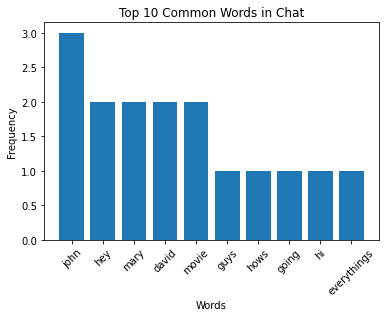

In [12]:
if __name__ == "__main__":
    main()